In [137]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
from utils import *
from sklearn import preprocessing as p
import random
import os 
import cv2

ATTS = np.load("test13_atts_10.npy",allow_pickle=True)

In [138]:
print(len(ATTS))
print(ATTS[0].shape)
print(ATTS[0][0].shape)
print(ATTS[0][0][0].shape)

10
torch.Size([1000, 81, 81])
torch.Size([81, 81])
torch.Size([81])


In [139]:
figure, axis = plt.subplots(10, 10, figsize=(100,100))

for neuron in range(100):
    im = axis[neuron//10,neuron%10].imshow(ATTS[5][neuron].detach().cpu().numpy(), cmap='hot', interpolation='nearest')
    axis[neuron//10,neuron%10].set_title("image number: " + str(neuron))
plt.show()

In [140]:
#raw heatmaps

neuron_num = 5
image_num = 0
for image_num in range(0,1000):
    row_num = random.randint(0,80)
    row = ATTS[neuron_num][image_num][row_num]
    row = row.reshape(9,9)
    plt.imshow(row,cmap='hot', interpolation='nearest')
    plt.colorbar()

    curr_dir = os.path.dirname("att_vis.ipynb")
    save_dir = os.path.join(curr_dir, f'./attention_heatmaps/test13_neuron_{neuron_num}/')
    file_name = f'image_{image_num}'
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    
    np.save(save_dir+file_name,row)
    plt.savefig(save_dir+file_name)
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
temp = ATTS[0][0][0].resize(9,9).detach().cpu().numpy()
resized = cv2.resize(temp, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)
plt.imshow(temp,cmap='hot', interpolation='nearest')
plt.show()
plt.clf()
plt.imshow(resized,cmap='hot', interpolation='nearest')
plt.show()


In [141]:
#resized heatmaps

neuron_num = 5
image_num = 0
for image_num in range(0,1000):
    row_num = random.randint(0,80)
    row = ATTS[neuron_num][image_num][row_num].resize(9,9).detach().cpu().numpy()
    resized = cv2.resize(row, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)

    plt.imshow(resized,cmap='hot', interpolation='nearest')
    plt.colorbar()

    curr_dir = os.path.dirname("att_vis.ipynb")
    save_dir = os.path.join(curr_dir, f'./attention_heatmaps_resized/test13_neuron_{neuron_num}/')
    file_name = f'image_{image_num}'
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    
    np.save(save_dir+file_name,resized)
    plt.savefig(save_dir+file_name)
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [142]:
val_img = np.load('../all_sites_data_prepared/pics_data/val_img_m1s1.npy')
val_resp = np.load('../all_sites_data_prepared/New_response_data/valRsp_m1s1.npy')
val_img = np.reshape(val_img,(1000,1,50,50))

In [10]:
val_img[0].shape
n0_resp = val_resp.transpose()[0]
max(n0_resp)
np.where(n0_resp == min(n0_resp))

(array([38]),)

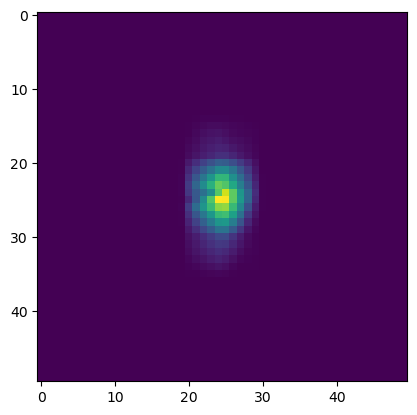

In [144]:
#point point multiplication visualization (heatmap * orig image)
neuron_num = 5
image_num = 0
for image_num in [10,12,380,417,709,996]:
    row_num = random.randint(0,80)
    row = ATTS[neuron_num][image_num][row_num].resize(9,9).detach().cpu().numpy()
    resized = cv2.resize(row, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)
    vis = np.multiply(val_img[image_num][0],resized)
    plt.imshow(vis)

    curr_dir = os.path.dirname("att_vis.ipynb")
    save_dir = os.path.join(curr_dir, f'./attention_visualized/test13_neuron_{neuron_num}/')
    file_name = f'image_{image_num}'
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

    #np.save(save_dir+file_name,resized)
    plt.savefig(save_dir+file_name)

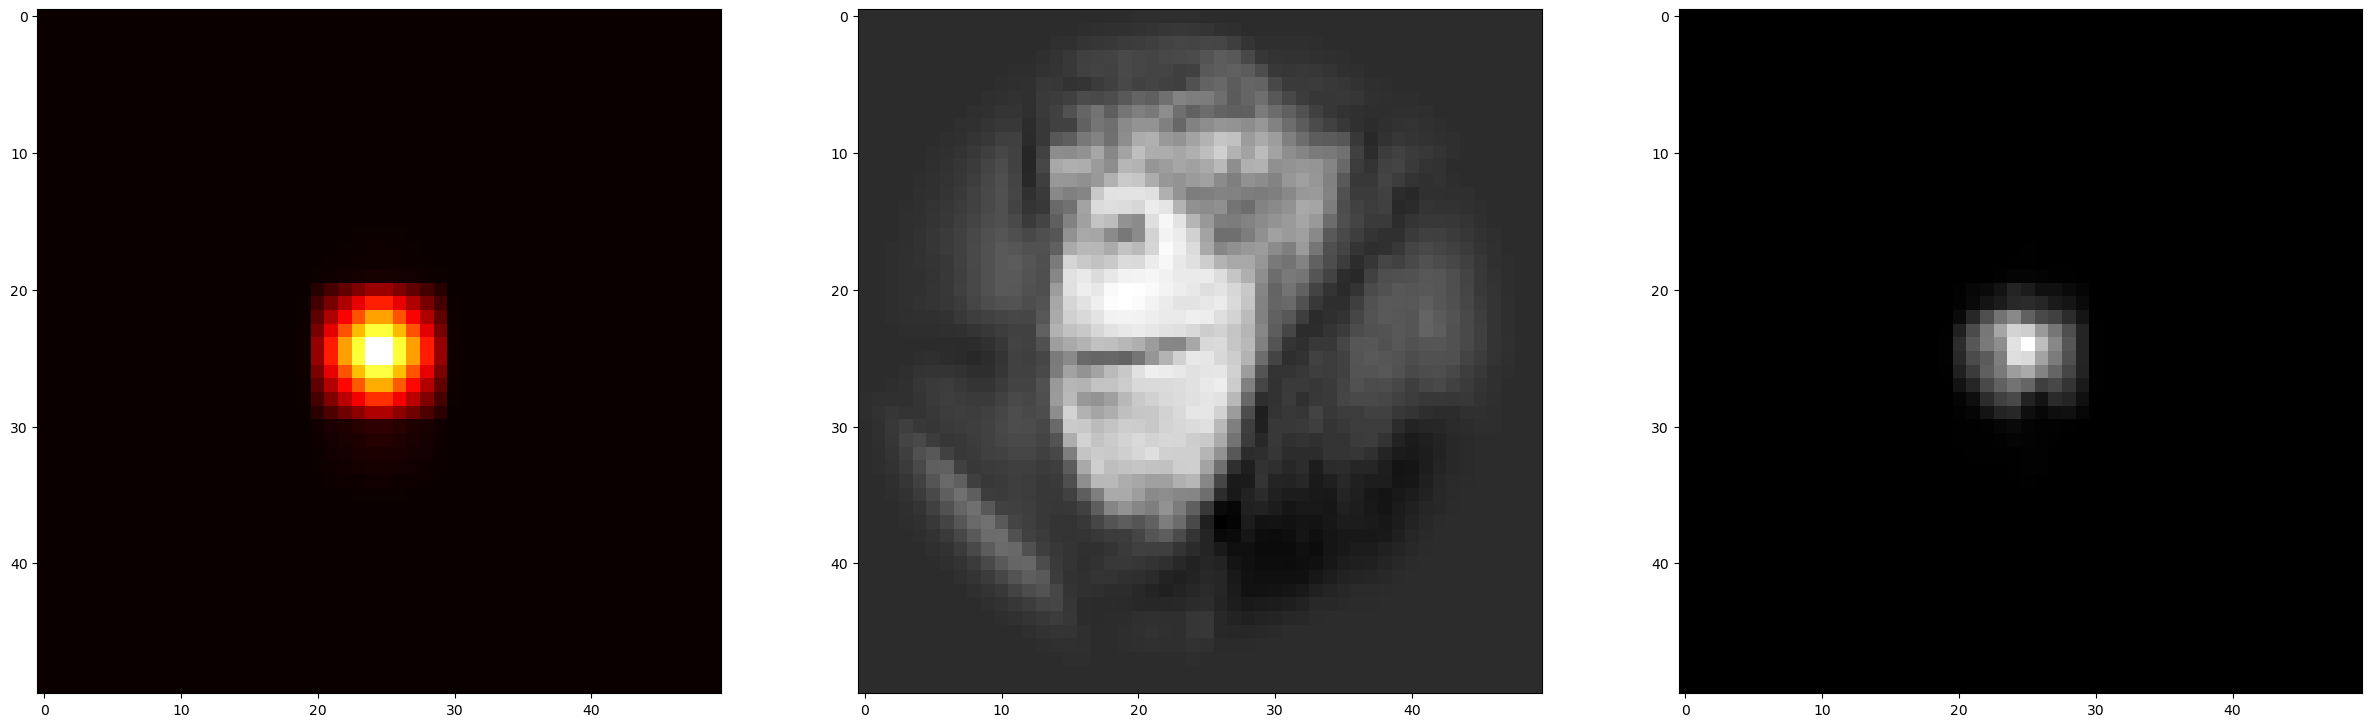

In [150]:
neuron_num = 5
image_num = 996
temp = ATTS[neuron_num][image_num][0].resize(9,9).detach().cpu().numpy()
resized = cv2.resize(temp, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)
figure, axis = plt.subplots(1, 3, figsize=(30,10))

axis[0].imshow(resized,cmap='hot', interpolation='nearest')
axis[1].imshow(val_img[image_num][0],cmap="gray")
temp = val_img[0][0]
temp = np.multiply(temp,resized)
axis[2].imshow(temp,cmap="gray")

plt.show()


